# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [121]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [122]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título

df.head()

df['title_length'] = df['title'].str.len()
df.head()

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12


In [123]:
# Calcula media, mediana y moda de la columna 'title_length'

media = df['title_length'].mean()
mediana = df['title_length'].median()
moda = df['title_length'].mode()

print(f'Media = {round(media,2)}, Mediana = {mediana}, Moda = {moda}')          # La moda me da una Serie

Media = 15.48, Mediana = 14.0, Moda = 0    12
Name: title_length, dtype: int64


In [124]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'

rango = df['title_length'].max() - df['title_length'].min()
varianza = df['title_length'].var()
desv = df['title_length'].std()

print(f'Rango = {rango}, Varianza = {varianza}, Desviacion_Estandar = {desv}')

Rango = 67, Varianza = 72.1067488840288, Desviacion_Estandar = 8.491569282766807


In [125]:
# Calcula asimetría y curtosis de la columna 'title_length'

### ASIMETRIA (SKEWNESS)

asimetria = df['title_length'].skew()
print(f'Asimetria (swewness) = {asimetria}')

if asimetria == 0:
    print('Los datos son bastante simetricos, tal como una distribucion normal.')
elif asimetria > 0:
    print('Asimetria positiva: los datos se concentran mas hacia la izquierda de la media (cola hacia la derecha).')
elif asimetria < 0:
    print('Asimetria negativa: los datos se concentran mas hacia la derecha de la media (cola hacia la izquierda).')

### CURTOSIS

curtosis = kurtosis(df['title_length'], fisher=True)               # Con False da curtosis total, no el exceso. (solo con scipy)
print(f'\nCurtosis = {curtosis}')

if curtosis == 0:
    print('Curtosis Mesocurtica: pico similar al de una distribucion normal.')

elif curtosis > 0:
    print('Curtosis Leptocurtica: pico mas agudo, es decir, gran parte de los datos se concentran cerca de la media, por lo cual existen mas valores atipicos.')

elif curtosis < 0:
    print('Curtosis Platicurtica: pico mas aplanado, es decir, los datos estan mas dispersos, lo cual hace que no haya tantos valores atipicos.')

Asimetria (swewness) = 1.5252523464631278
Asimetria positiva: los datos se concentran mas hacia la izquierda de la media (cola hacia la derecha).

Curtosis = 3.7867237597626007
Curtosis Leptocurtica: pico mas agudo, es decir, gran parte de los datos se concentran cerca de la media, por lo cual existen mas valores atipicos.


In [126]:
# Imprime el título más corto y el título más largo según su longitud

#### METODO 1: Ordenar de mayor a menor segun 'title_length' y revisar indices respectivos

df_ordenado = df.sort_values('title_length', ascending = False)

df_ordenado.head()
titulo_mas_largo = df.iloc[48,1]
print(f'Titulo mas largo: {titulo_mas_largo}')

# Y similar para el titulo mas corto:

df_ordenado.tail()
titulo_mas_corto = df.iloc[63,1]
print(f'Titulo mas corto: {titulo_mas_corto}\n')


### METODO 2: Usar max() y min() y acceder a su titulo respectivo

# Confirmamos cuantos maximos y minimos hay

maximo = df['title_length'].max()
minimo = df['title_length'].min()

cantidad_maximos = (df['title_length'] == maximo).sum()
cantidad_minimos = (df['title_length'] == minimo).sum()

# Se descubre que solo hay 1 titulo con el valor maximo de caracteres (68) y 1 con el valor minimo (1).

mas_largo_serie = df.loc[df['title_length']==maximo,'title']     # Coge la fila del title_length = 68 y me da el valor de la columna title
mas_largo = mas_largo_serie.iloc[0]                              # Convierto la serie en un objeto string
print(f'Titulo mas largo: {mas_largo}')

# Lo mismo para el titulo mas corto:

mas_corto_serie = df.loc[df['title_length']==minimo,'title']
mas_corto = mas_corto_serie.iloc[0]
print(f'Titulo mas corto: {mas_corto}')

Titulo mas largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Titulo mas corto: M

Titulo mas largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Titulo mas corto: M


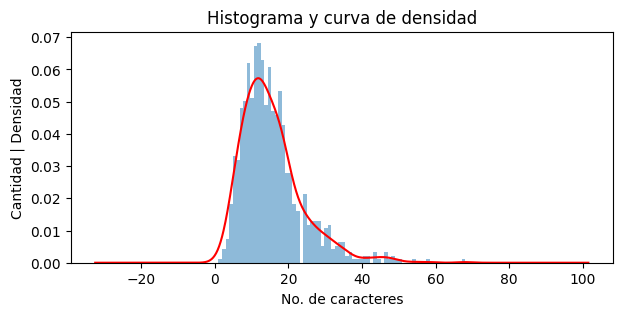

In [127]:
# grafica tus resultados

datos = df['title_length']
type(datos)                 # Serie

conteo = df['title_length'].value_counts()
#print(conteo)

plt.figure(figsize = (7, 3))
datos.plot(kind='hist', density=True, bins=70, alpha=0.5)       # HISTOGRAMA --> x (# de caracteres) vs Cantidad de cada x
datos.plot(kind='kde', color='red')                             # DENSIDAD   --> x (# de caracteres) vs Densidad

plt.title('Histograma y curva de densidad')
plt.xlabel('No. de caracteres')
plt.ylabel('Cantidad | Densidad')
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [128]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]

np.random.seed(100)

aleatorios = np.random.choice(df['title_length'],5)
type(aleatorios)            # ndarray

lista = list(aleatorios)
type(lista) 
print(f"Lista de 'title_length' = {lista}")

Lista de 'title_length' = [np.int64(26), np.int64(13), np.int64(15), np.int64(2), np.int64(19)]


In [129]:
# Calcula la media de los 5 valores

miu = sum(lista) / len(lista)
print(f'miu = {miu}')

miu = 15.0


In [130]:
# Calcula las diferencias al cuadrado con respecto a la media

diferencias = []

for x in lista:
    diferencia = (x-miu)**2
    diferencias.append(diferencia)

print(f'Diferencias de cuadrados = {diferencias}')

Diferencias de cuadrados = [np.float64(121.0), np.float64(4.0), np.float64(0.0), np.float64(169.0), np.float64(16.0)]


In [131]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

varianza = sum(diferencias) / len(diferencias)

desv_std = varianza**(1/2)

print(f'Varianza = {varianza}')
print(f'Desviacion Estandar = {desv_std}')

# CONFIRMANDO CON NUMPY

v = np.var(aleatorios)
d = np.std(aleatorios)
print(f'{v} | {d}')

Varianza = 62.0
Desviacion Estandar = 7.874007874011811
62.0 | 7.874007874011811
